<a href="https://colab.research.google.com/github/Aishwarya2k7/ImagetoCartoon/blob/main/Cartoon.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow
from google.colab import files

In [5]:
def read_file(filename):
  img = cv2.imread(filename)
  cv2_imshow(img)
  return img

Saving ash.jpg to ash (1).jpg


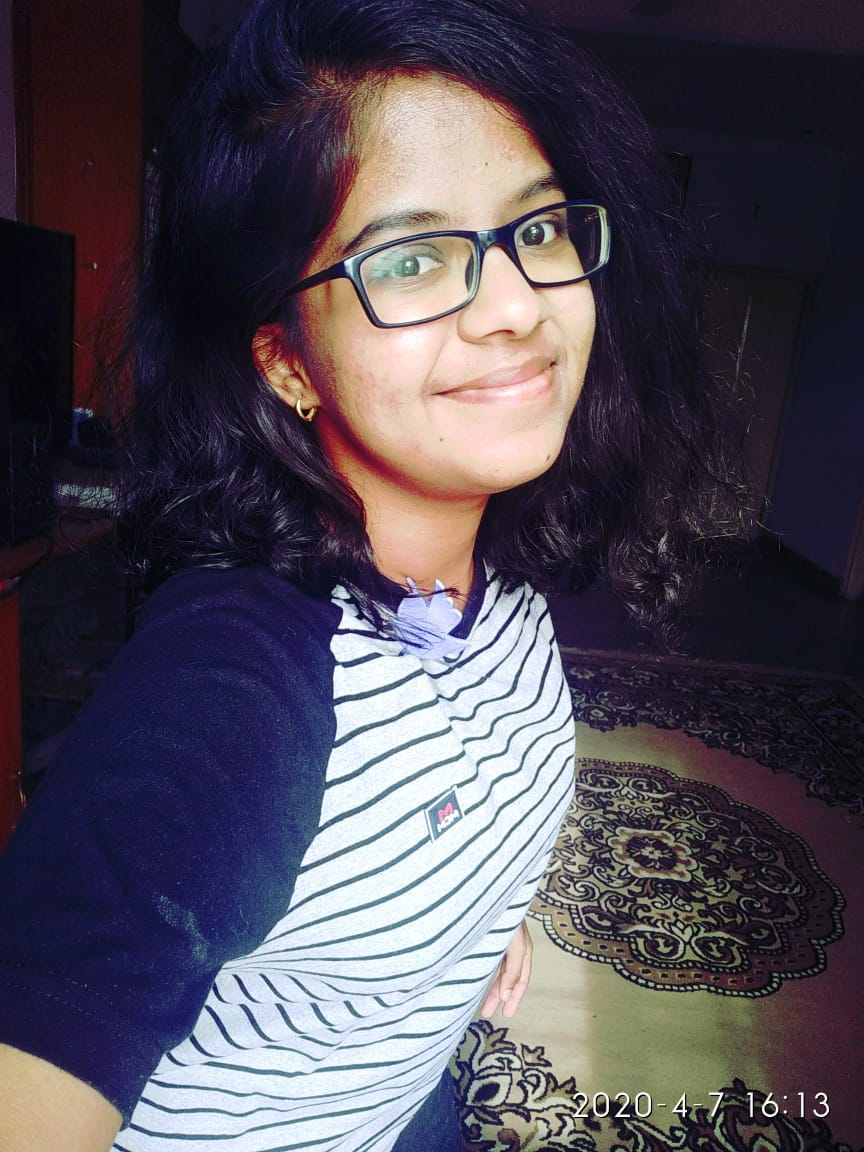

In [6]:
uploaded = files.upload()
filename = next(iter(uploaded))
img = read_file(filename)

In [10]:
def edgemask(img,line_size,blur):
  gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
  grayblur = cv2.medianBlur(gray,blur)
  edges = cv2.adaptiveThreshold(grayblur,255,cv2.ADAPTIVE_THRESH_MEAN_C,cv2.THRESH_BINARY,line_size,blur)
  return edges


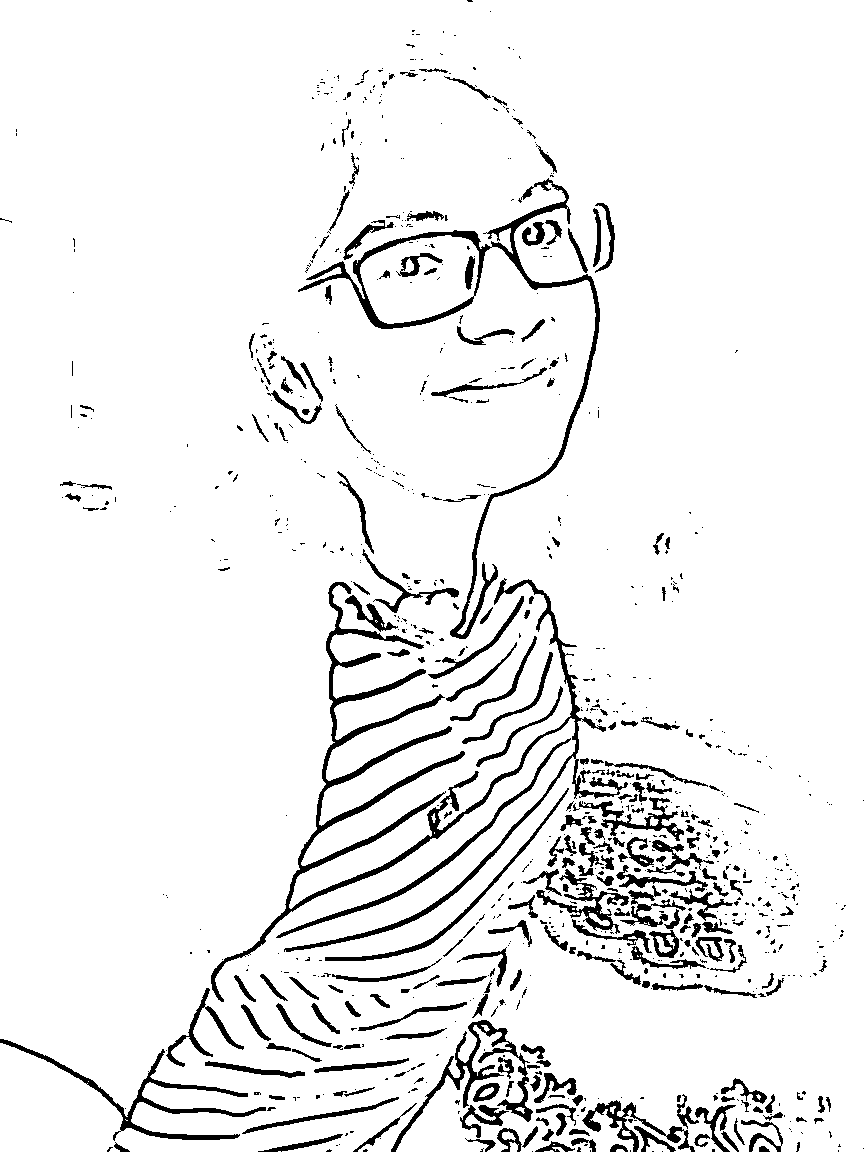

In [21]:
line_size =9
blur = 5
edges = edgemask(img,line_size,blur)
cv2_imshow(edges)

In [22]:
def color_quantization(img,k):
  data = np.float32(img).reshape((-1,3))
  criteria = (cv2.TERM_CRITERIA_EPS+cv2.TERM_CRITERIA_MAX_ITER,20,0.001)

  ret,label,center = cv2.kmeans(data,k,None,criteria,10,cv2.KMEANS_RANDOM_CENTERS)
  center = np.uint8(center)
  res = center[label.flatten()]
  res = res.reshape(img.shape)
  return res

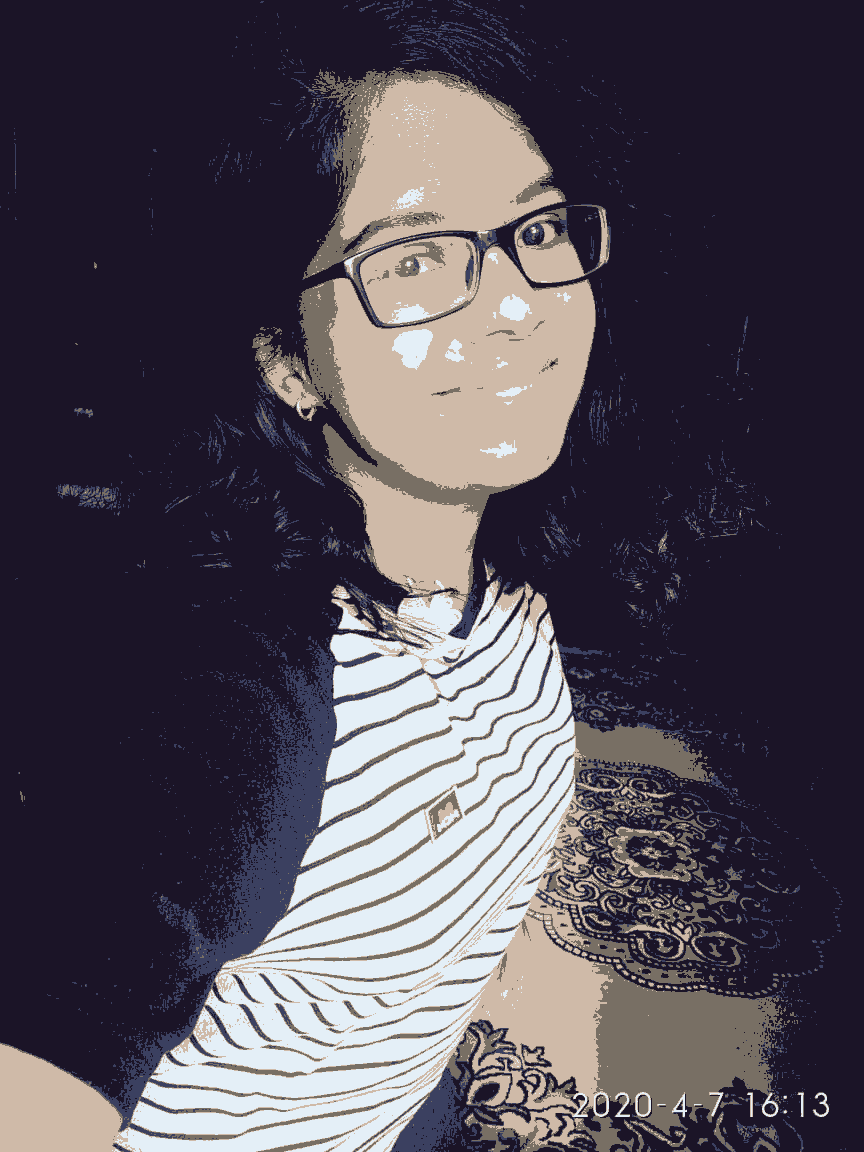

In [25]:
img = color_quantization(img,11)
cv2_imshow(img)

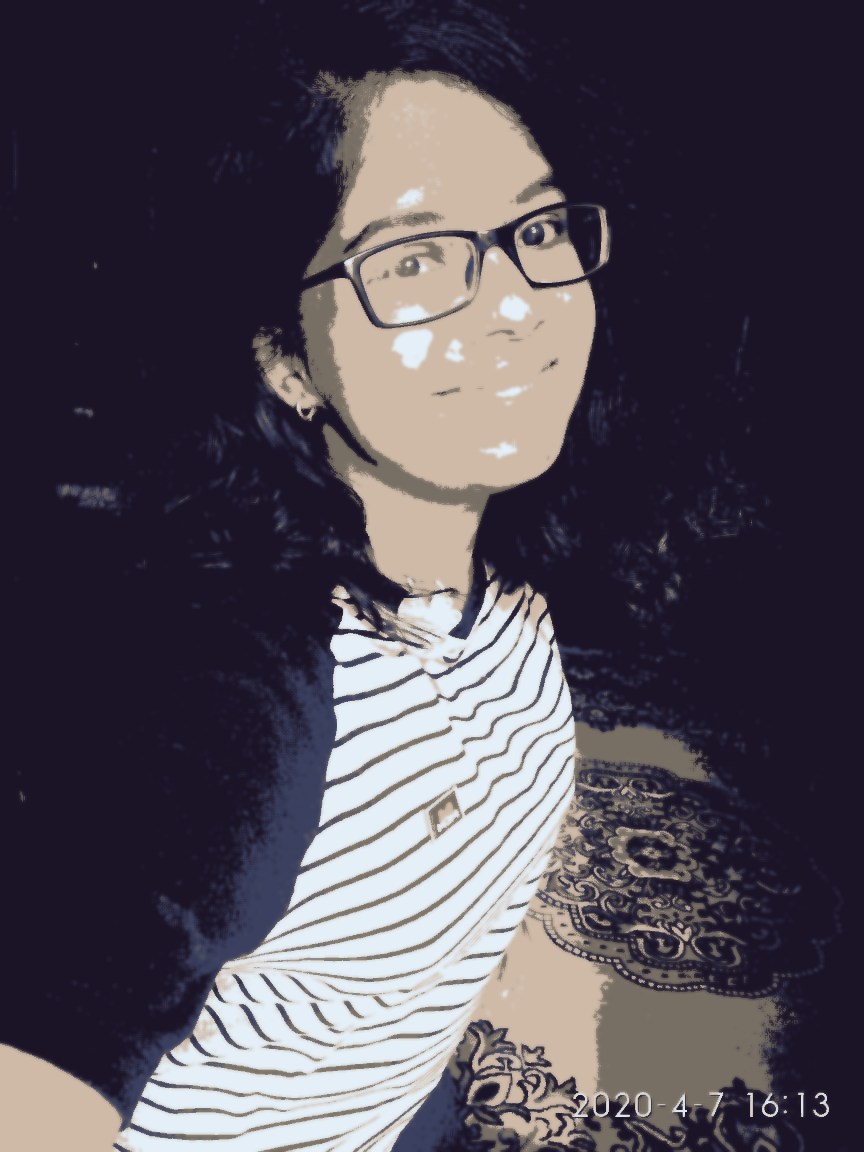

In [26]:
blurred = cv2.bilateralFilter(img,d=7,sigmaColor=200,sigmaSpace=200)
cv2_imshow(blurred)


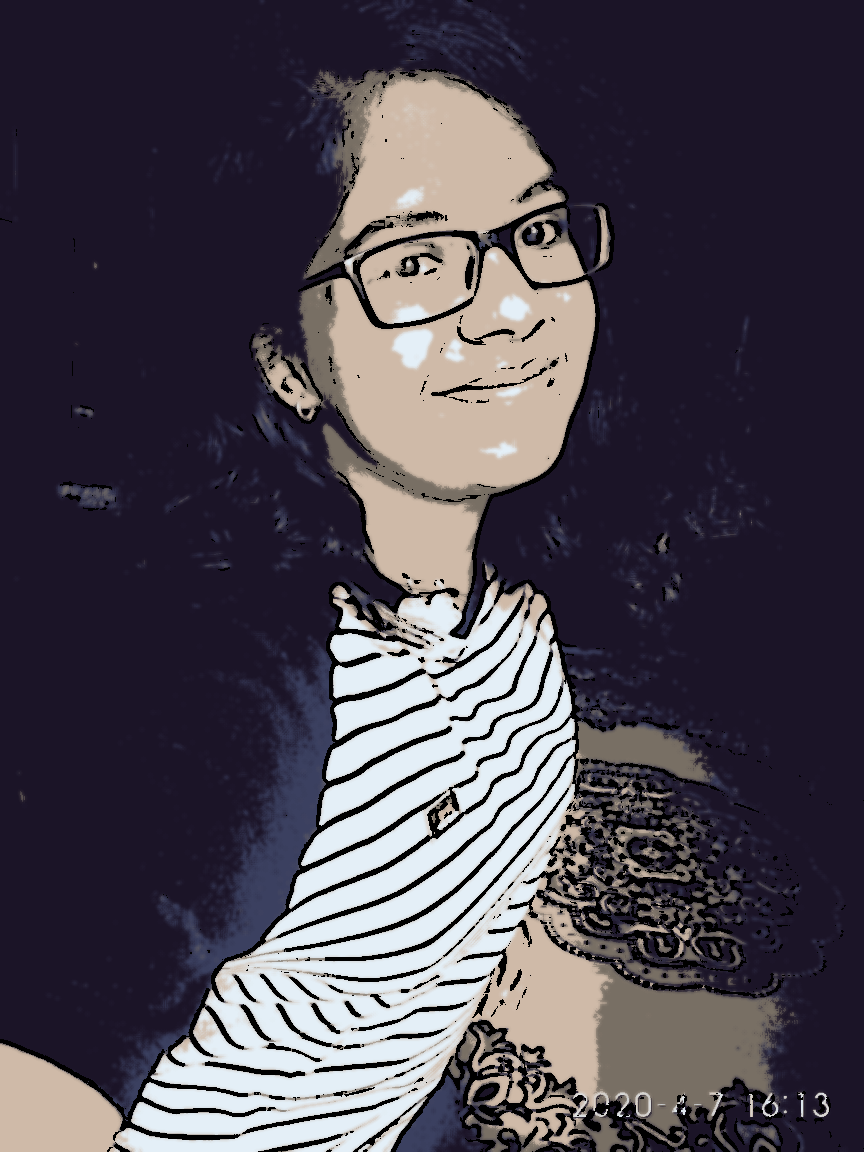

In [27]:
cartoon = cv2.bitwise_and(blurred, blurred, mask=edges)
cv2_imshow(cartoon)